### Outlier detection using percentiles

Just set the thresholds for the percetiles, for example 1 and 99 percentiles

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.sample(3)

,Gender,Height,Weight
5215,Female,62.806199,116.733315
7063,Female,59.850245,101.716163
5263,Female,63.475872,127.160705


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_10448\3624568819.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

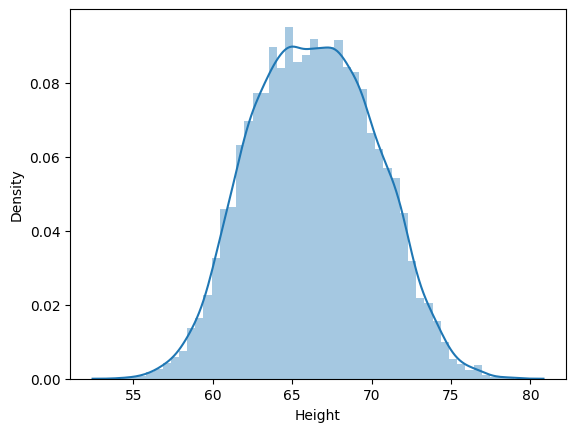

In [6]:
import seaborn as sns

sns.distplot(df['Height'])

<Axes: ylabel='Height'>

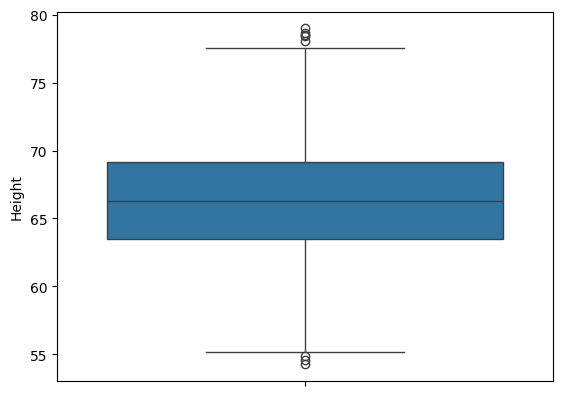

In [7]:
sns.boxplot(df['Height'])

Always make the thresholds symmetric

In [8]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)

In [9]:
upper_limit

74.7857900583366

In [10]:
lower_limit

58.13441158671655

In [12]:
df[ (df['Height'] > 74.78) | (df['Height'] < 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [13]:
new_df=df[ (df['Height'] < 74.78) & (df['Height'] > 58.13)]

In [14]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [15]:
new_df.describe()

,Height,Weight
count,9799.000000,9799.000000
mean,66.363507,161.391522
std,3.644267,30.925072
min,58.134496,77.523774
25%,63.577147,136.320936
50%,66.317899,161.201891
75%,69.119859,186.747036
max,74.767447,249.946283


C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_10448\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

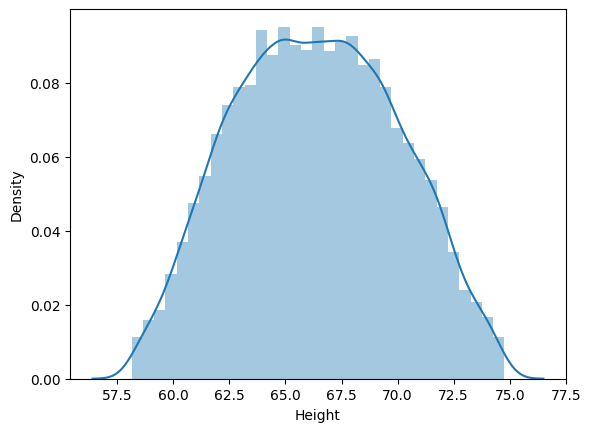

In [18]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

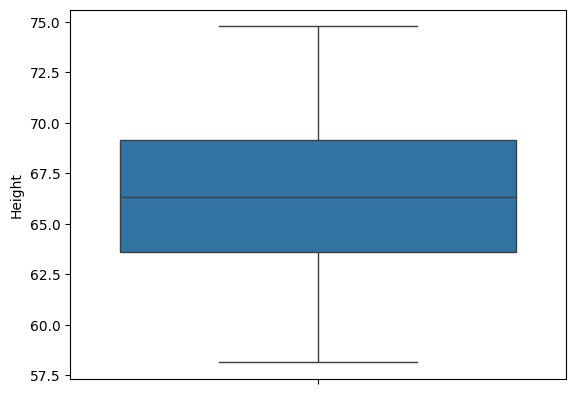

In [17]:
sns.boxplot(new_df['Height'])

### Capping, also called as Winsorization

In [21]:
df['Height']=np.where(df['Height']>=upper_limit,
         upper_limit,
         np.where(df['Height']<=lower_limit,
         lower_limit,
         df['Height']))

<Axes: ylabel='Height'>

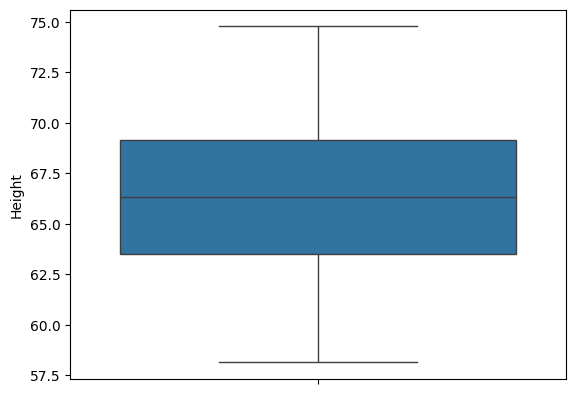

In [22]:
sns.boxplot(df['Height'])

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64